# Table of Contents
   
3. [Machine Learning](#ml)

   3.1. [Random Forest](#randomforest)
   
   3.2. [Neural Network](#network)
   
   3.3. [XGBoost](#xgboost)
   
   3.4. [Explainability](#explain)
   

!pip install pandas
!pip install numpy
!pip install matplotlib
!pip install seaborn
!pip install plotly
!pip install category_encoders
!pip install scikit-learn
!pip install scikeras
!pip install keras
!pip install xgboost
!pip install scipy
!pip install imbalanced-learn
!pip install dash
!pip install dash-bootstrap-components
!pip install shap

# Imports <a id='imports'></a>

In [20]:
# General
import warnings 
warnings.filterwarnings('ignore', category=FutureWarning)
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from imblearn.pipeline import Pipeline

# Data Cleaning and Preprocessing
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.compose import ColumnTransformer
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, DBSCAN
from scipy.cluster import hierarchy

# Machine Learning Models and Evaluation
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from scikeras.wrappers import KerasClassifier
from keras.models import Sequential
from keras.layers import Dense, Dropout, Input
from keras.optimizers import Adam, SGD
import xgboost as xgb

# Clustering Algorithms
from sklearn.cluster import KMeans, DBSCAN
from scipy.cluster import hierarchy

# Model Evaluation Metrics
from sklearn.metrics import (
    r2_score, mean_absolute_error, mean_squared_error, f1_score, roc_auc_score,
    precision_score, recall_score, accuracy_score, classification_report, confusion_matrix,
    roc_curve
)

# Cross-Validation and Model Selection
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_predict, GridSearchCV

# Handling Imbalanced Data
from imblearn.over_sampling import SMOTE

# Dashboard Development
from dash import Dash, html, dcc, callback, Output, Input, dash_table
import dash_bootstrap_components as dbc

# SHAP for Model Interpretability
import shap


## Loading the cleaned Dataset <a id='dataset'></a>

In [23]:
# Dataset available here:
# https://www.kaggle.com/datasets/uciml/breast-cancer-wisconsin-data/data

# load cleaned dataset (see step 1)
df = pd.read_csv('cancer_cleaned.csv')

# Machine Learning <a id='ml'></a>

## Data 

In [27]:
df_for_ml = df.copy()
df_for_ml.head()

,diagnosis,radius_mean,perimeter_mean,area_mean,compactness_mean,concavity_mean,concave points_mean,radius_se,perimeter_se,area_se,radius_worst,perimeter_worst,area_worst,compactness_worst,concavity_worst,concave points_worst
0,1,17.99,122.80,1001.0,0.27760,0.3001,0.14710,1.0950,8.589,153.40,25.38,184.60,2019.0,0.6656,0.7119,0.2654
1,1,20.57,132.90,1326.0,0.07864,0.0869,0.07017,0.5435,3.398,74.08,24.99,158.80,1956.0,0.1866,0.2416,0.1860
2,1,19.69,130.00,1203.0,0.15990,0.1974,0.12790,0.7456,4.585,94.03,23.57,152.50,1709.0,0.4245,0.4504,0.2430
3,1,11.42,77.58,386.1,0.28390,0.2414,0.10520,0.4956,3.445,27.23,14.91,98.87,567.7,0.8663,0.6869,0.2575
4,1,20.29,135.10,1297.0,0.13280,0.1980,0.10430,0.7572,5.438,94.44,22.54,152.20,1575.0,0.2050,0.4000,0.1625


In [29]:
X = df_for_ml.drop(['diagnosis'],axis = 1 )
y = df_for_ml['diagnosis']

### Validation Functions

In [32]:
def cr_validate(y_test, y_pred, y_pred_proba):
    
    tn, fp, fn, tp = confusion_matrix(y_train, y_pred).ravel()

    # calculations
    accuracy = accuracy_score(y_train, y_pred)
    specificity = tn / (tn + fp)
    sensitivity = recall_score(y_train, y_pred)
    precision = precision_score(y_train, y_pred)
    f1 = f1_score(y_train, y_pred)
    roc_auc = roc_auc_score(y_train, y_pred_proba)

    # output metrics
    print(f"Specificity: {specificity:.4f}")
    print(f"Sensitivity (Recall): {sensitivity:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"F1-Score: {f1:.4f}")
    print(f"ROC AUC: {roc_auc:.4f}")

    # ROC curve
    fpr, tpr, _ = roc_curve(y_train, y_pred_proba)

    plt.figure()
    plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic')
    plt.legend(loc="lower right")
    plt.show()

    plt.figure(figsize=(6,4))
    sns.heatmap(confusion_matrix(y_train, y_pred), annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix')
    plt.show()

In [34]:
def validate_model(y_test, y_pred, y_pred_proba):
    
    # Calculate confusion matrix components
    tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
    
    # Calculate metrics
    specificity = tn / (tn + fp)
    sensitivity = recall_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred_proba)
    
    print(f"Specificity: {specificity:.4f}")
    print(f"Sensitivity (Recall): {sensitivity:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"F1-Score: {f1:.4f}")
    print(f"ROC AUC: {roc_auc:.4f}")
   
    return specificity, sensitivity, precision, accuracy, f1, roc_auc

## Random Forest <a id='randomforest'></a>

Hyperparameter search:

warnings.filterwarnings('ignore')
forest_params_gridsearch = {
    'n_estimators': [50, 100, 150],
    'max_depth': [5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 5],
    'max_features': ['auto', 'sqrt', 'log2'],
    'criterion': ['gini', 'entropy']
}

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 42)

rfc_for_gridsearch = RandomForestClassifier()
clf = GridSearchCV(rfc_for_gridsearch, forest_params_gridsearch, cv = 10, scoring='accuracy')
clf.fit(X_train, y_train)

print(clf.best_params_)
print(clf.best_score_)

{'criterion': 'entropy', 'max_depth': 15, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
0.9582125603864735

### Random Forest Validation

Specificity: 0.9544
Sensitivity (Recall): 0.9294
Precision: 0.9240
Accuracy: 0.9451
F1-Score: 0.9267
ROC AUC: 0.9815


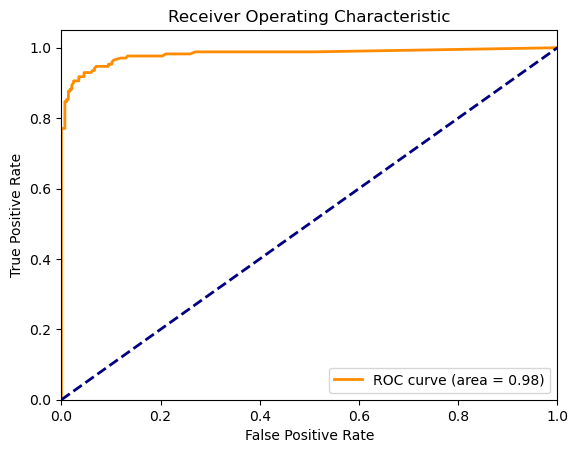

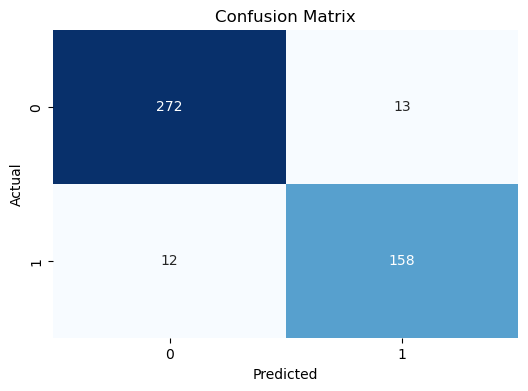

In [112]:
########################## DEFINE HYPERPARAMETERS HERE #################################################

criterion = 'entropy'
n_estimators = 100
max_depth = 15
min_samples_split = 2
min_samples_leaf = 1
max_features = 'sqrt'

########################################################################################################

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

pipeline = Pipeline([
    ('smote', SMOTE(random_state=42)),
    ('rf', RandomForestClassifier(
    n_estimators=n_estimators,
    max_depth=max_depth,
    min_samples_split=min_samples_split,
    min_samples_leaf=min_samples_leaf,
    max_features=max_features,
    random_state=42))
])

cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
y_pred = cross_val_predict(pipeline, X_train, y_train, cv=cv, method='predict')
y_pred_proba = cross_val_predict(pipeline, X_train, y_train, cv=cv, method='predict_proba')[:, 1]

cr_validate(y_train, y_pred, y_pred_proba)

## Neural Network <a id='network'></a>

Hyperparameter search:


def create_model(n_layers=3, n_neurons=100, activation='relu', learning_rate=0.001, dropout_rate=0.1, optimizer='adam'):
    model = Sequential()
    model.add(Input(shape=(n_cols,)))  # Define the input layer with the correct input shape
    model.add(Dense(n_neurons, activation=activation))
    
    for _ in range(n_layers - 1):
        model.add(Dense(n_neurons, activation=activation))
        model.add(Dropout(dropout_rate))
    
    model.add(Dense(1, activation='sigmoid'))
    
    if optimizer == 'adam':
        opt = Adam(learning_rate=learning_rate)
    elif optimizer == 'sgd':
        opt = SGD(learning_rate=learning_rate)
    else:
        raise ValueError("Unsupported optimizer: {}".format(optimizer))
    
    model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])
    return model


model = KerasClassifier(model=create_model, verbose=0)


param_grid = {
    'model__n_layers': [2, 3, 4],
    'model__n_neurons': [100, 150, 200],
    'model__activation': ['relu', 'sigmoid'],
    'model__learning_rate': [0.001, 0.002],
    'model__dropout_rate': [0.1, 0.2],
    'model__optimizer': ['adam', 'sgd'],
    'batch_size': [8, 16]
}


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
n_cols = X_train.shape[1]  # Define the number of features


grid = GridSearchCV(estimator=model, param_grid=param_grid, cv=5)
grid_result = grid.fit(X_train, y_train)


print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.881319 using {'batch_size': 16, 'model__activation': 'sigmoid', 'model__dropout_rate': 0.2, 'model__learning_rate': 0.001, 'model__n_layers': 2, 'model__n_neurons': 200, 'model__optimizer': 'adam'}

### Neural Network Validation

In [115]:
# NEURAL NETWORK CROSS VALIDATION WITH SMOTE
########################## DEFINE HYPERPARAMETERS HERE #################################################

n_layers = 2 
n_neurons = 200 
activation = 'sigmoid'  
learning_rate = 0.001  
dropout_rate = 0.2  
optimizer_choice = 'adam'  
batch_size = 16

########################################################################################################

skf = StratifiedKFold(n_splits=10)
sq_for_cv_rocs = []
sq_for_cv_sensitivities = []
sq_for_cv_specificities = []
sq_for_cv_precisions = []
sq_for_cv_accuracies = []
sq_for_cv_fmeasures = []

smote = SMOTE(random_state=42)

for train_index, test_index in skf.split(X, y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    # Apply SMOTE to the training data
    X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)
    
    n_cols = X.shape[1]
    sq_for_cv = Sequential()
    sq_for_cv.add(Dense(n_neurons, activation=activation, input_shape=(n_cols,)))
    for i in range(n_layers - 1):
        sq_for_cv.add(Dense(n_neurons, activation=activation))
        sq_for_cv.add(Dropout(dropout_rate))
    sq_for_cv.add(Dense(1, activation='sigmoid'))  # Sigmoid for binary classification

    if optimizer_choice == 'adam':
        optimizer = Adam(learning_rate=learning_rate)
    elif optimizer_choice == 'sgd':
        optimizer = SGD(learning_rate=learning_rate)
    
    sq_for_cv.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])
    sq_for_cv.fit(X_train_smote, y_train_smote, epochs=50, batch_size=batch_size, verbose=1)

    predicted_proba = sq_for_cv.predict(X_test)
    predicted = np.round(predicted_proba)

    tn, fp, fn, tp = confusion_matrix(y_test, predicted).ravel()
    tn = float(tn)
    fp = float(fp)
    fn = float(fn)
    tp = float(tp)

    roc = roc_auc_score(y_test, predicted_proba)
    sensitivity = float(tp / (tp + fn))
    specificity = float(tn / (tn + fp))
    precision = float(tp / (tp + fp))
    accuracy = float((tp + tn) / (tp + tn + fn + fp))
    fmeasure = float(2 * precision * sensitivity) / (precision + sensitivity)

    sq_for_cv_rocs.append(roc)
    sq_for_cv_sensitivities.append(sensitivity)
    sq_for_cv_specificities.append(specificity)
    sq_for_cv_precisions.append(precision)
    sq_for_cv_accuracies.append(accuracy)
    sq_for_cv_fmeasures.append(fmeasure)

mean_roc = sum(sq_for_cv_rocs) / 10
mean_sensitivity = sum(sq_for_cv_sensitivities) / 10
mean_specificity = sum(sq_for_cv_specificities) / 10
mean_precision = sum(sq_for_cv_precisions) / 10
mean_accuracy = sum(sq_for_cv_accuracies) / 10
mean_fmeasure = sum(sq_for_cv_fmeasures) / 10

print(f"Mean ROC: {mean_roc:.4f}")
print(f"Mean Sensitivity: {mean_sensitivity:.4f}")
print(f"Mean Specificity: {mean_specificity:.4f}")
print(f"Mean Precision: {mean_precision:.4f}")
print(f"Mean Accuracy: {mean_accuracy:.4f}")
print(f"Mean F-measure: {mean_fmeasure:.4f}")

cv_results = {
    'ROCs': sq_for_cv_rocs,
    'Sensitivities': sq_for_cv_sensitivities,
    'Specificities': sq_for_cv_specificities,
    'Precisions': sq_for_cv_precisions,
    'Accuracies': sq_for_cv_accuracies,
    'F-measures': sq_for_cv_fmeasures
}
df_cv_results = pd.DataFrame(cv_results)

print(df_cv_results)

Epoch 1/50


C:\Users\Stella\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



41/41 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.5936 - loss: 0.6808
Epoch 2/50
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9009 - loss: 0.3249
Epoch 3/50
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8849 - loss: 0.2807
Epoch 4/50
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8938 - loss: 0.2427
Epoch 5/50
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9114 - loss: 0.2281
Epoch 6/50
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9259 - loss: 0.1961
Epoch 7/50
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9093 - loss: 0.2031
Epoch 8/50
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9084 - loss: 0.2366
Epoch 9/50
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9108 - loss: 0.2425
Epoch 10/50
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8938 - loss: 0.2335
Epoch 11/50
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9055 - loss: 0.2157
Epoch 12/50
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8920 - loss: 0.2349


C:\Users\Stella\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



41/41 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.6488 - loss: 0.6350
Epoch 2/50
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8933 - loss: 0.3337
Epoch 3/50
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8787 - loss: 0.3180
Epoch 4/50
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8967 - loss: 0.2788
Epoch 5/50
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8965 - loss: 0.2243
Epoch 6/50
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8915 - loss: 0.2321
Epoch 7/50
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8985 - loss: 0.2471
Epoch 8/50
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9018 - loss: 0.2367
Epoch 9/50
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9095 - loss: 0.2248
Epoch 10/50
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9147 - loss: 0.2351
Epoch 11/50
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9277 - loss: 0.2062
Epoch 12/50
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9102 - loss: 0.2286


C:\Users\Stella\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



41/41 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.6336 - loss: 0.6196
Epoch 2/50
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8780 - loss: 0.3375
Epoch 3/50
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9068 - loss: 0.2433
Epoch 4/50
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9187 - loss: 0.2547
Epoch 5/50
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8997 - loss: 0.2516
Epoch 6/50
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8887 - loss: 0.2314
Epoch 7/50
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8887 - loss: 0.2622
Epoch 8/50
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9170 - loss: 0.2090
Epoch 9/50
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8936 - loss: 0.2579
Epoch 10/50
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9211 - loss: 0.1970
Epoch 11/50
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9013 - loss: 0.2280
Epoch 12/50
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9241 - loss: 0.2079


C:\Users\Stella\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



41/41 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.5898 - loss: 0.6672
Epoch 2/50
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8804 - loss: 0.4002
Epoch 3/50
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8768 - loss: 0.3255
Epoch 4/50
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8861 - loss: 0.2900
Epoch 5/50
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8875 - loss: 0.2905
Epoch 6/50
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9048 - loss: 0.2493
Epoch 7/50
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8895 - loss: 0.2834
Epoch 8/50
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8951 - loss: 0.2666
Epoch 9/50
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9218 - loss: 0.2070
Epoch 10/50
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9048 - loss: 0.2333
Epoch 11/50
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8978 - loss: 0.2675
Epoch 12/50
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9113 - loss: 0.2292


C:\Users\Stella\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



41/41 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.6119 - loss: 0.6590 
Epoch 2/50
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8384 - loss: 0.4049 
Epoch 3/50
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8903 - loss: 0.2683 
Epoch 4/50
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8823 - loss: 0.2660 
Epoch 5/50
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9073 - loss: 0.2564 
Epoch 6/50
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8756 - loss: 0.2999 
Epoch 7/50
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9067 - loss: 0.2460 
Epoch 8/50
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8922 - loss: 0.2347
Epoch 9/50
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8845 - loss: 0.2584 
Epoch 10/50
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9102 - loss: 0.2141
Epoch 11/50
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9159 - loss: 0.1988
Epoch 12/50
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9109 - loss:

C:\Users\Stella\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



41/41 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.6012 - loss: 0.6494
Epoch 2/50
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8698 - loss: 0.3910
Epoch 3/50
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9029 - loss: 0.2947
Epoch 4/50
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9008 - loss: 0.2793
Epoch 5/50
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8964 - loss: 0.2644
Epoch 6/50
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9165 - loss: 0.2227
Epoch 7/50
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8902 - loss: 0.2481
Epoch 8/50
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8929 - loss: 0.2267
Epoch 9/50
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9210 - loss: 0.2154
Epoch 10/50
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9133 - loss: 0.2028
Epoch 11/50
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8618 - loss: 0.2923
Epoch 12/50
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8914 - loss: 0.2419


C:\Users\Stella\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



41/41 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.6106 - loss: 0.6361
Epoch 2/50
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8715 - loss: 0.3661
Epoch 3/50
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8947 - loss: 0.3067
Epoch 4/50
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8935 - loss: 0.2609
Epoch 5/50
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8971 - loss: 0.2504
Epoch 6/50
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8828 - loss: 0.2241
Epoch 7/50
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8860 - loss: 0.2693
Epoch 8/50
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8428 - loss: 0.2786
Epoch 9/50
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9112 - loss: 0.2094
Epoch 10/50
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8736 - loss: 0.2671
Epoch 11/50
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8732 - loss: 0.2638
Epoch 12/50
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8854 - loss: 0.2531


C:\Users\Stella\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



41/41 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.6833 - loss: 0.6122
Epoch 2/50
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8909 - loss: 0.3508
Epoch 3/50
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8807 - loss: 0.3046
Epoch 4/50
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9002 - loss: 0.2485
Epoch 5/50
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8933 - loss: 0.2591
Epoch 6/50
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9094 - loss: 0.2326
Epoch 7/50
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9052 - loss: 0.2270
Epoch 8/50
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9209 - loss: 0.2064
Epoch 9/50
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8457 - loss: 0.3316
Epoch 10/50
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8478 - loss: 0.3453
Epoch 11/50
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9100 - loss: 0.2246
Epoch 12/50
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8973 - loss: 0.2422


C:\Users\Stella\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



41/41 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.6586 - loss: 0.6242
Epoch 2/50
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8862 - loss: 0.3524
Epoch 3/50
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8897 - loss: 0.2758
Epoch 4/50
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9156 - loss: 0.2254
Epoch 5/50
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9072 - loss: 0.2096
Epoch 6/50
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9070 - loss: 0.2296
Epoch 7/50
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8779 - loss: 0.2627
Epoch 8/50
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9005 - loss: 0.2173
Epoch 9/50
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8914 - loss: 0.2387
Epoch 10/50
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8980 - loss: 0.2199
Epoch 11/50
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9081 - loss: 0.2324
Epoch 12/50
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8962 - loss: 0.2230


C:\Users\Stella\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



41/41 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.6688 - loss: 0.6136
Epoch 2/50
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9105 - loss: 0.3134
Epoch 3/50
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9056 - loss: 0.2407
Epoch 4/50
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8830 - loss: 0.2740
Epoch 5/50
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8955 - loss: 0.2321
Epoch 6/50
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8947 - loss: 0.2504
Epoch 7/50
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8963 - loss: 0.2439
Epoch 8/50
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9213 - loss: 0.2200
Epoch 9/50
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9001 - loss: 0.2256
Epoch 10/50
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8957 - loss: 0.2681
Epoch 11/50
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9097 - loss: 0.2355
Epoch 12/50
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8954 - loss: 0.2297


## XGBoost <a id='xgboost'></a>

Hyperparameter tuning:

param_grid = {
    'n_estimators': [100, 200],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 5, 7],
    'min_child_weight': [1, 3, 5],
    'subsample': [0.8, 0.9, 1.0],
    'colsample_bytree': [0.8, 0.9, 1.0],
    'gamma': [0, 0.1, 0.3],
    'reg_alpha': [0, 0.01, 0.1],
    'reg_lambda': [1, 10, 100],
}

xg_reg = xgb.XGBClassifier()

clf = GridSearchCV(xg_reg, param_grid, cv=10, scoring='accuracy', verbose=1, n_jobs=-1)
clf.fit(X_train, y_train)

print(clf.best_params_)
print(clf.best_score_)

{'colsample_bytree': 0.8, 'gamma': 0.1, 'learning_rate': 0.05, 'max_depth': 5, 'min_child_weight': 3, 'n_estimators': 100, 'reg_alpha': 0, 'reg_lambda': 1, 'subsample': 0.9}
0.9604347826086957

### XGBoost Validation

Specificity: 0.9509
Sensitivity (Recall): 0.9294
Precision: 0.9186
Accuracy: 0.9429
F1-Score: 0.9240
ROC AUC: 0.9850


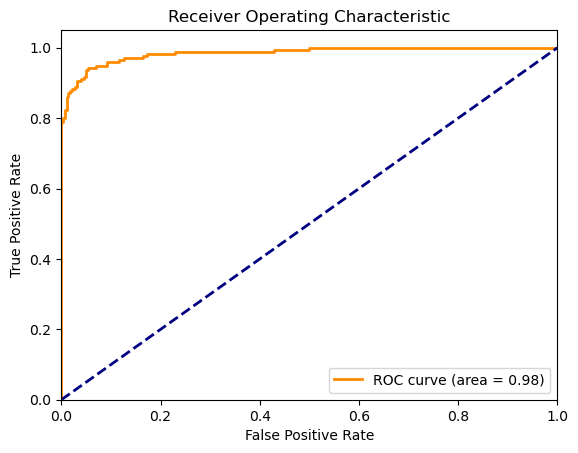

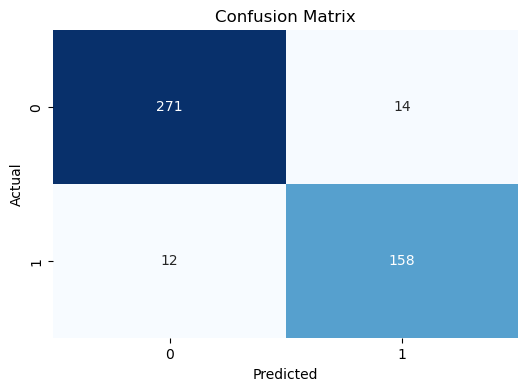

In [117]:
# XGBOOST CROSS VALIDATION 
########################## DEFINE HYPERPARAMETERS HERE #################################################

n_estimators = 100
colsample_bytree = 0.8
learning_rate = 0.05
max_depth = 5
min_child_weight = 3
subsample = 0.9
gamma = 0.1
reg_alpha = 0
reg_lambda = 1

########################################################################################################

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

xgb_classifier_cv = xgb.XGBClassifier(
    n_estimators=n_estimators,
    colsample_bytree=colsample_bytree,
    learning_rate=learning_rate,
    max_depth=max_depth,
    min_child_weight=min_child_weight,
    subsample=subsample,
    gamma=gamma,
    reg_alpha=reg_alpha,
    reg_lambda=reg_lambda,
    objective='binary:logistic',
    eval_metric='logloss'
)

pipeline = Pipeline([
    ('smote', SMOTE(random_state=42)),
    ('xgb', xgb_classifier_cv)
])

cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
y_pred = cross_val_predict(pipeline, X_train, y_train, cv=cv, method='predict')
y_pred_proba = cross_val_predict(pipeline, X_train, y_train, cv=cv, method='predict_proba')[:, 1]

cr_validate(y_test, y_pred, y_pred_proba)

## Explainability <a id='explain'></a>

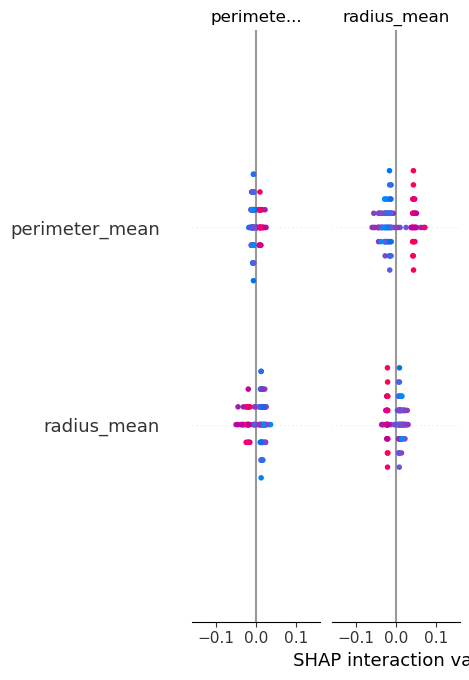

In [119]:
# Random Forest
########################## DEFINE HYPERPARAMETERS HERE #################################################

criterion = 'entropy'
n_estimators = 100
max_depth = 15
min_samples_split = 2
min_samples_leaf = 1
max_features = 'sqrt'

########################################################################################################

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Apply SMOTE
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

rf_for_shap = RandomForestClassifier(
    n_estimators=n_estimators,
    max_depth=max_depth,
    min_samples_split=min_samples_split,
    min_samples_leaf=min_samples_leaf,
    max_features=max_features,
    random_state=42
)

rf_for_shap.fit(X_train_smote, y_train_smote)

explainer = shap.TreeExplainer(rf_for_shap)
shap_values = explainer.shap_values(X_test)
shap.summary_plot(shap_values, X_test)

In [ ]:
# Neural Network
########################## DEFINE HYPERPARAMETERS HERE #################################################

n_layers = 2 
n_neurons = 200 
activation = 'sigmoid'  
learning_rate = 0.001  
dropout_rate = 0.2  
optimizer_choice = 'adam'  
batch_size = 16 

########################################################################################################

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Apply SMOTE
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

n_cols = X.shape[1]

sq_for_shap = Sequential()
sq_for_shap.add(Dense(n_neurons, activation=activation, input_shape=(n_cols,)))
for i in range(n_layers - 1):
    sq_for_shap.add(Dense(n_neurons, activation=activation))
    sq_for_shap.add(Dropout(dropout_rate))
sq_for_shap.add(Dense(1, activation='sigmoid'))  # Sigmoid for binary classification

if optimizer_choice == 'adam':
    optimizer = Adam(learning_rate=learning_rate)
elif optimizer_choice == 'sgd':
    optimizer = SGD(learning_rate=learning_rate)

sq_for_shap.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])
sq_for_shap.fit(X_train_smote, y_train_smote, epochs=50, batch_size=batch_size, verbose=1)

explainer = shap.KernelExplainer(sq_for_shap.predict, X_train_smote[:100])  # Use a subset for background dataset
shap_values = explainer.shap_values(X_test[:100])  # Use a subset of the test set for efficiency
shap.summary_plot(shap_values, X_test[:100])


C:\Users\Stella\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



Epoch 1/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.6300 - loss: 0.6356
Epoch 2/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9213 - loss: 0.3214
Epoch 3/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8989 - loss: 0.2457
Epoch 4/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9047 - loss: 0.2172
Epoch 5/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9289 - loss: 0.1882
Epoch 6/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9234 - loss: 0.2175
Epoch 7/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9028 - loss: 0.2209
Epoch 8/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9130 - loss: 0.2202
Epoch 9/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9209 - loss: 0.1992
Epoch 10/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9096 - loss: 0.2075
Epoch 11/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9103 - loss: 0.2121
Epoch 12/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8940 - lo

  0%|          | 0/100 [00:00<?, ?it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
6494/6494 ━━━━━━━━━━━━━━━━━━━━ 9s 1ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
6494/6494 ━━━━━━━━━━━━━━━━━━━━ 8s 1ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
6494/6494 ━━━━━━━━━━━━━━━━━━━━ 8s 1ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
6494/6494 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
6494/6494 ━━━━━━━━━━━━━━━━━━━━ 8s 1ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
6494/6494 ━━━━━━━━━━━━━━━━━━━━ 8s 1ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
6494/6494 ━━━━━━━━━━━━━━━━━━━━ 8s 1ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
6494/6494 ━━━━━━━━━━━━━━━━━━━━ 8s 1ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
6494/6494 ━━━━━━━━━━━━━━━━━━━━ 8s 1ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
6494/6494 ━━━━━━━━━━━━━━━━━━━━ 9s 1ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
6494/6494 ━━━━━━━━━━━━━━━━━━━━ 9s 1ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
6494/6494 ━━━━━━━━━━━━━━━━━━━━ 8s 1ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s

<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

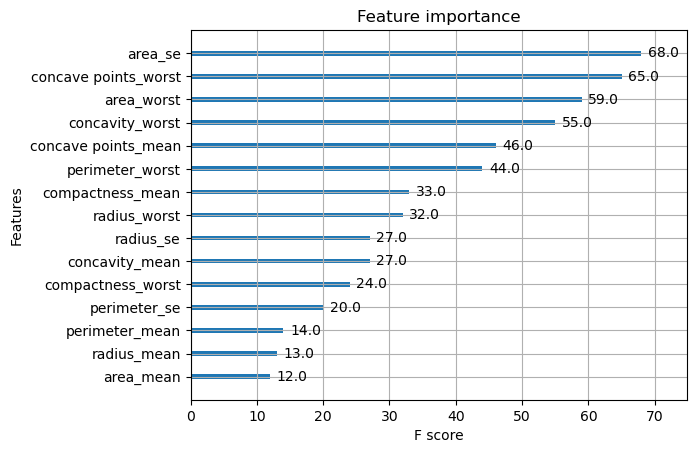

In [36]:
# XGBoost
########################## DEFINE HYPERPARAMETERS HERE #################################################

n_estimators = 100
colsample_bytree = 0.8
learning_rate = 0.05
max_depth = 5
min_child_weight = 3
subsample = 0.9
gamma = 0.1
reg_alpha = 0
reg_lambda = 1

########################################################################################################

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Apply SMOTE
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

xgb_for_xai = xgb.XGBClassifier(
    n_estimators=n_estimators,
    colsample_bytree=colsample_bytree,
    learning_rate=learning_rate,
    max_depth=max_depth,
    min_child_weight=min_child_weight,
    subsample=subsample,
    gamma=gamma,
    reg_alpha=reg_alpha,
    reg_lambda=reg_lambda,
    objective='binary:logistic',
    eval_metric='logloss'
)

xgb_for_xai.fit(X_train_smote, y_train_smote)

xgb.plot_importance(xgb_for_xai)